In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load your wine dataset
# Replace 'wine_data.csv' with the path to your dataset file
data = pd.read_csv('wine.csv')

In [3]:
# Separate features and labels
X = data.drop('Customer_Segment', axis=1)
y = data['Customer_Segment']

In [4]:
# Step 3: Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [5]:
# Step 4: Calculate the Covariance Matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

In [6]:
# Step 5: Calculate Principal Components
pca = PCA()
pca.fit(X_standardized)

PCA()

In [7]:
# Step 6: Select the Principal Components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

In [8]:
# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

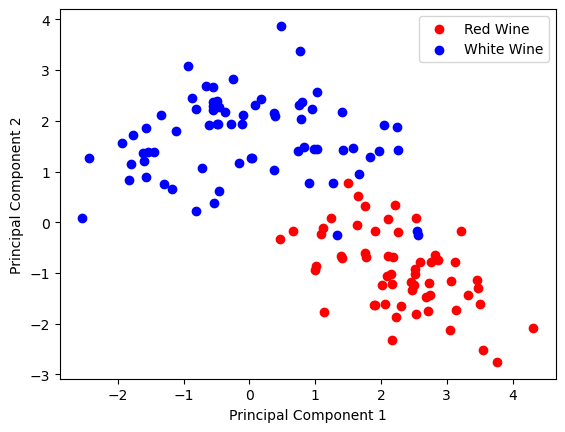

In [9]:
# Now, X_pca contains the data transformed into the reduced dimension space

# Visualize the results to distinguish between red and white wines
plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], label='Red Wine', c='r')
plt.scatter(X_pca[y == 2][:, 0], X_pca[y == 2][:, 1], label='White Wine', c='b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()